In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [30]:
# Load csv file and clean 

mvc_gi_df = pd.read_csv("./General_info.csv")
print(mvc_gi_df.head())

   CRASH DATE CRASH TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0   9/11/2021       2:39       NaN       NaN        NaN        NaN   
1   3/26/2022      11:45       NaN       NaN        NaN        NaN   
2   6/29/2022       6:55       NaN       NaN        NaN        NaN   
3   9/11/2021       9:35  BROOKLYN   11208.0  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN   11233.0  40.683304 -73.917274   

                  LOCATION           ON STREET NAME  COLLISION_ID  
0                      NaN    WHITESTONE EXPRESSWAY       4455765  
1                      NaN  QUEENSBORO BRIDGE UPPER       4513547  
2                      NaN       THROGS NECK BRIDGE       4541903  
3    (40.667202, -73.8665)                      NaN       4456314  
4  (40.683304, -73.917274)          SARATOGA AVENUE       4486609  


In [31]:
#Check for missing values
print(mvc_gi_df.isnull().sum())

CRASH DATE             0
CRASH TIME             0
BOROUGH           376686
ZIP CODE          376870
LATITUDE           74796
LONGITUDE          74796
LOCATION           74796
ON STREET NAME    257021
COLLISION_ID           0
dtype: int64


In [33]:
#Clean data by removing NaN's
#mvc_gi_df_clean = mvc_gi_df.dropna(axis=0)
# Drop rows and copy 
mvc_clean = mvc_gi_df.dropna(subset=['BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE']).copy()

# Convert 'Crash Date' to datetime
mvc_clean.loc[:,'CRASH DATE'] = pd.to_datetime(mvc_clean['CRASH DATE'])

# Display summary of cleaned data
print(mvc_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651657 entries, 3 to 1048572
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CRASH DATE      651657 non-null  datetime64[ns]
 1   CRASH TIME      651657 non-null  object        
 2   BOROUGH         651657 non-null  object        
 3   ZIP CODE        651657 non-null  float64       
 4   LATITUDE        651657 non-null  float64       
 5   LONGITUDE       651657 non-null  float64       
 6   LOCATION        651657 non-null  object        
 7   ON STREET NAME  412518 non-null  object        
 8   COLLISION_ID    651657 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 49.7+ MB
None


In [40]:
#saving progress
#mvc_gi_df_clean.to_csv('mvc_gi_df_clean.csv', index=False)

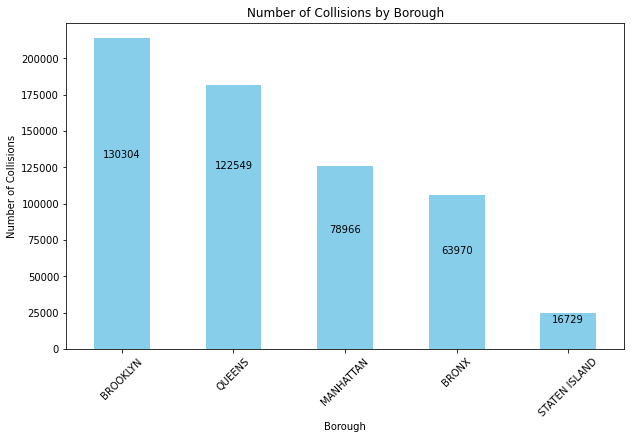

In [48]:
# Count of collisions by borough
borough_collisions = mvc_clean['BOROUGH'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt_axes = borough_collisions.plot(kind='bar', color='skyblue')
plt.title('Number of Collisions by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)


#Annote collision counts
plt_axes.bar_label(ax.containers[0])
plt.show()

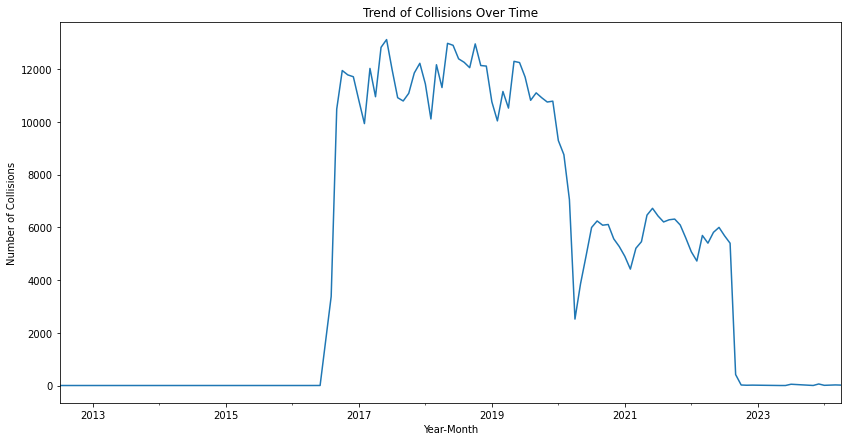

In [84]:
# Plot trend of collisions over time
# Trend of collisions over time
mvc_clean['CRASH DATE'] = pd.to_datetime(mvc_clean['CRASH DATE'])
mvc_clean['Year-Month'] = mvc_clean['CRASH DATE'].dt.to_period('M')
collisions_over_time = mvc_clean.groupby('Year-Month').size()

# Plotting
plt.figure(figsize=(14, 7))
collisions_over_time.plot(kind='line')
plt.title('Trend of Collisions Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Collisions')
plt.show()


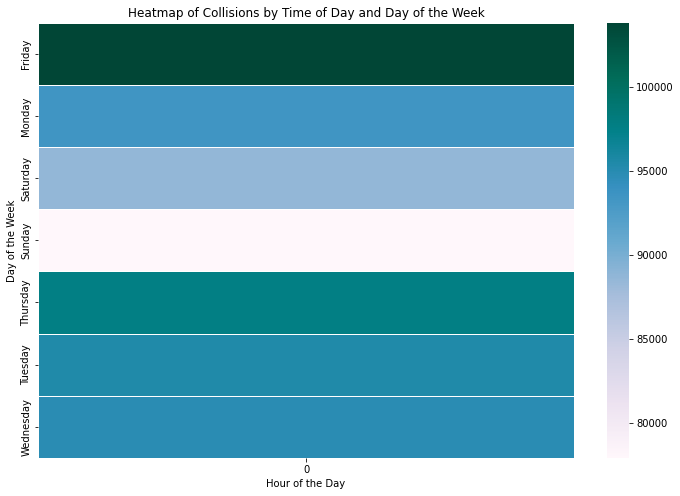

In [74]:
# Extract day of the week and hour of the day
mvc_clean['Day of Week'] = mvc_clean['CRASH DATE'].dt.day_name()
mvc_clean['Hour of Day'] = pd.to_datetime(mvc_clean['CRASH DATE'], format='%H:%M').dt.hour

# Create pivot table
heatmap_data = mvc_clean.pivot_table(index='Day of Week', columns='Hour of Day', aggfunc='size', fill_value=0)

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='PuBuGn', linewidths=.5)
plt.title('Heatmap of Collisions by Time of Day and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


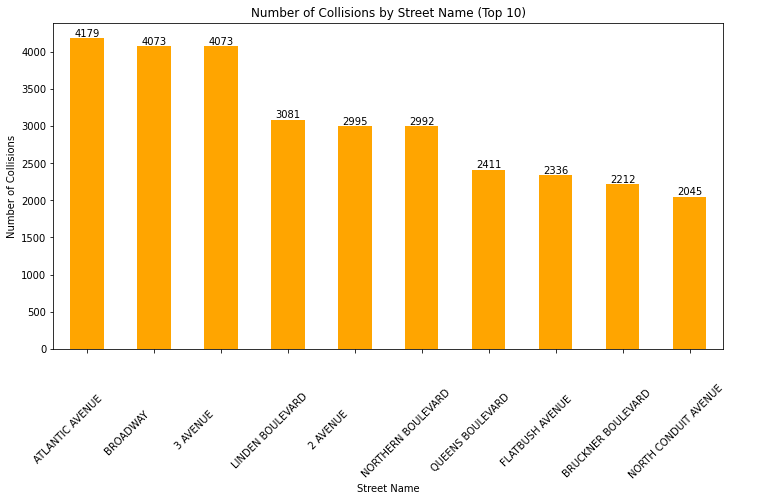

In [71]:

# Count of collisions by street name
street_collisions = mvc_clean['ON STREET NAME'].value_counts().head(10)  # Top 10 streets for simplicity

# Plotting
plt.figure(figsize=(12, 6))
plt_axes = street_collisions.plot(kind='bar', color='orange')
plt.title('Number of Collisions by Street Name (Top 10)')
plt.xlabel('Street Name')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)

# Annotate counts
plt_axes.bar_label(plt_axes.containers[0])
plt.show()